In [35]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model
from math import sqrt

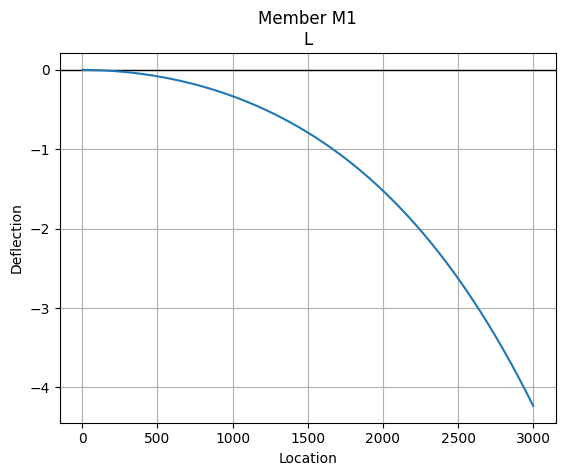

0.0

In [56]:
frame_model = FEModel3D() # Creates an empty model

H = 3000 # mm
L = 10000 # mm
w = 78 # N/mm

frame_model.add_node("node1",0,0,0)
frame_model.add_node("node2",0,H,0)
frame_model.add_node("node3",L/2,H+500,0)
frame_model.add_node("node4",L,H,0)
frame_model.add_node("node5",L,0,0)

m = (L/2)**2 + 500**2
member_length = sqrt(m)

frame_model.add_material(name='Steel', E=200e3, G=77e3, nu=0.3, rho=7.7e-6)
frame_model.add_member('M1', 'node1', 'node2', 'Steel', 100e6, 800e6, 100e3, 2000)
frame_model.add_member('M2', 'node2', 'node3', 'Steel', 100e6, 800e6, 100e3, 2000)
frame_model.add_member('M3', 'node3', 'node4', 'Steel', 100e6, 800e6, 100e3, 2000)
frame_model.add_member('M4', 'node4', 'node5', 'Steel', 100e6, 800e6, 100e3, 2000)

frame_model.add_load_combo('L',{"D":1})
frame_model.add_member_dist_load("M1", "Fy", -w, -w, 0, H, case="D")
frame_model.add_member_dist_load("M4", "Fy", w, w, 0, H, case="D")
frame_model.add_member_dist_load("M2", "Fy", -w, -w, 0, member_length, case="D")
frame_model.add_member_dist_load("M3", "Fy", -w, -w, 0, member_length, case="D")

frame_model.def_support('node1', True, True, True, True, True, True)
frame_model.def_support('node5', True, True, True, True, True, True)
render_model(frame_model, combo_name="L", annotation_size=300)
frame_model.analyze()
frame_model.Members['M1'].plot_deflection('dy', combo_name="L",n_points=1000)
frame_model.Members['M1'].max_deflection('dy', combo_name="L")
